<a href="https://colab.research.google.com/github/arudhatt/covid_data_analysis/blob/main/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
# filter warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Load Covid Dataset

In [ ]:
# Read CSV file into a data frame
covid_df = pd.read_csv('COVID_dataset.csv')
covid_df.head()

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,2020-03-30,2020-03-31,2020-03-31,2020-03-30,70s,MALE,OB,Stratford,Yes,43.368662,-81.001913,Fatal
1,2021-01-22,2021-01-24,2021-01-24,2021-01-23,50s,FEMALE,NO KNOWN EPI LINK,Newmarket,NaN,44.048023,-79.480239,Not Resolved
2,2020-03-24,2020-04-14,2020-04-14,2020-04-13,70s,FEMALE,OB,Toronto,Yes,43.656591,-79.379358,Resolved
3,2021-01-18,2021-01-21,2021-01-21,2021-01-18,<20,MALE,CC,Mississauga,NaN,43.647471,-79.708893,Not Resolved
4,2020-12-26,2020-12-28,2020-12-28,2020-12-26,60s,MALE,OB,Windsor,Yes,42.308796,-83.033670,Resolved


In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14860 entries, 0 to 14859
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accurate_Episode_Date    14860 non-null  object 
 1   Case_Reported_Date       14860 non-null  object 
 2   Test_Reported_Date       14657 non-null  object 
 3   Specimen_Date            14738 non-null  object 
 4   Age_Group                14855 non-null  object 
 5   Client_Gender            14860 non-null  object 
 6   Case_AcquisitionInfo     14860 non-null  object 
 7   Reporting_PHU_City       14860 non-null  object 
 8   Outbreak_Related         5778 non-null   object 
 9   Reporting_PHU_Latitude   14860 non-null  float64
 10  Reporting_PHU_Longitude  14860 non-null  float64
 11  Outcome1                 14860 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.4+ MB


### Covid Data Preprocessing

In [ ]:
covid_df.Age_Group.unique()

array(['70s', '50s', '<20', '60s', '20s', '80s', '40s', '90s', '30s', nan],
      dtype=object)

In [ ]:
age_mapping = {'90s':90,'80s':80,'70s':70,'60s':60,'50s':50,'40s':40,'30s':30,'20s':20,'<20':10}

In [ ]:
covid_df['Age_Group'] = covid_df['Age_Group'].map(age_mapping)

In [ ]:
covid_df.Client_Gender.unique()

array(['MALE', 'FEMALE', 'UNSPECIFIED', 'GENDER DIVERSE'], dtype=object)

In [ ]:
covid_df.Case_AcquisitionInfo.unique()

array(['OB', 'NO KNOWN EPI LINK', 'CC', 'MISSING INFORMATION', 'TRAVEL',
       'UNSPECIFIED EPI LINK'], dtype=object)

In [ ]:
covid_df.Outbreak_Related.unique()

array(['Yes', nan], dtype=object)

In [ ]:
covid_df['Outbreak_Related'].fillna('No', inplace = True)

In [ ]:
covid_df.Outcome1.unique()

array(['Fatal', 'Not Resolved', 'Resolved'], dtype=object)

In [ ]:
covid_df.isnull().sum()

Accurate_Episode_Date        0
Case_Reported_Date           0
Test_Reported_Date         203
Specimen_Date              122
Age_Group                    5
Client_Gender                0
Case_AcquisitionInfo         0
Reporting_PHU_City           0
Outbreak_Related             0
Reporting_PHU_Latitude       0
Reporting_PHU_Longitude      0
Outcome1                     0
dtype: int64

In [ ]:
covid_df.shape

(14860, 12)

In [ ]:
covid_df.dropna(axis=0, subset=['Age_Group'], inplace=True)

In [ ]:
covid_df.dropna(axis=0, subset=['Test_Reported_Date'], inplace=True)

In [ ]:
covid_df.dropna(axis=0, subset=['Specimen_Date'], inplace=True)

In [ ]:
covid_df.nunique(axis=0)

Accurate_Episode_Date      332
Case_Reported_Date         323
Test_Reported_Date         320
Specimen_Date              324
Age_Group                    9
Client_Gender                4
Case_AcquisitionInfo         6
Reporting_PHU_City          34
Outbreak_Related             2
Reporting_PHU_Latitude      34
Reporting_PHU_Longitude     34
Outcome1                     3
dtype: int64

In [ ]:
covid_df['Accurate_Episode_Date'] = pd.to_datetime(covid_df['Accurate_Episode_Date'],
                                                   infer_datetime_format=True, errors='coerce')
covid_df['Case_Reported_Date'] = pd.to_datetime(covid_df['Case_Reported_Date'],
                                                   infer_datetime_format=True, errors='coerce')
covid_df['Test_Reported_Date'] = pd.to_datetime(covid_df['Test_Reported_Date'],
                                                   infer_datetime_format=True, errors='coerce')
covid_df['Specimen_Date'] = pd.to_datetime(covid_df['Specimen_Date'],
                                                   infer_datetime_format=True, errors='coerce')

In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14650 entries, 0 to 14859
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Accurate_Episode_Date    14650 non-null  datetime64[ns]
 1   Case_Reported_Date       14650 non-null  datetime64[ns]
 2   Test_Reported_Date       14650 non-null  datetime64[ns]
 3   Specimen_Date            14650 non-null  datetime64[ns]
 4   Age_Group                14650 non-null  float64       
 5   Client_Gender            14650 non-null  object        
 6   Case_AcquisitionInfo     14650 non-null  object        
 7   Reporting_PHU_City       14650 non-null  object        
 8   Outbreak_Related         14650 non-null  object        
 9   Reporting_PHU_Latitude   14650 non-null  float64       
 10  Reporting_PHU_Longitude  14650 non-null  float64       
 11  Outcome1                 14650 non-null  object        
dtypes: datetime64[ns](4), float64(3)

In [ ]:
covid_df.head()

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,2020-03-30,2020-03-31,2020-03-31,2020-03-30,70.0,MALE,OB,Stratford,Yes,43.368662,-81.001913,Fatal
1,2021-01-22,2021-01-24,2021-01-24,2021-01-23,50.0,FEMALE,NO KNOWN EPI LINK,Newmarket,No,44.048023,-79.480239,Not Resolved
2,2020-03-24,2020-04-14,2020-04-14,2020-04-13,70.0,FEMALE,OB,Toronto,Yes,43.656591,-79.379358,Resolved
3,2021-01-18,2021-01-21,2021-01-21,2021-01-18,10.0,MALE,CC,Mississauga,No,43.647471,-79.708893,Not Resolved
4,2020-12-26,2020-12-28,2020-12-28,2020-12-26,60.0,MALE,OB,Windsor,Yes,42.308796,-83.033670,Resolved


In [ ]:
rnn_df = covid_df.copy()

In [ ]:
import datetime as dt
import calendar
def to_ksp_format(datetime):
    year = datetime.year
    day_from_jan_1 = (datetime - dt.datetime(year, 1, 1)).days
    is_leap_year = int(calendar.isleap(year))
    return year + (day_from_jan_1 - 0.5) / (365 + is_leap_year)
covid_df['Accurate_Episode_Date'] = covid_df['Accurate_Episode_Date'].apply(to_ksp_format)
covid_df['Case_Reported_Date'] = covid_df['Case_Reported_Date'].apply(to_ksp_format)
covid_df['Test_Reported_Date'] = covid_df['Test_Reported_Date'].apply(to_ksp_format)
covid_df['Specimen_Date'] = covid_df['Specimen_Date'].apply(to_ksp_format)

In [ ]:
cat_col = ['Client_Gender', 'Case_AcquisitionInfo','Outbreak_Related']

In [ ]:
covid_enc = pd.get_dummies(covid_df, columns = cat_col)

In [ ]:
covid_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14650 entries, 0 to 14859
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Accurate_Episode_Date                      14650 non-null  float64
 1   Case_Reported_Date                         14650 non-null  float64
 2   Test_Reported_Date                         14650 non-null  float64
 3   Specimen_Date                              14650 non-null  float64
 4   Age_Group                                  14650 non-null  float64
 5   Reporting_PHU_City                         14650 non-null  object 
 6   Reporting_PHU_Latitude                     14650 non-null  float64
 7   Reporting_PHU_Longitude                    14650 non-null  float64
 8   Outcome1                                   14650 non-null  object 
 9   Client_Gender_FEMALE                       14650 non-null  uint8  
 10  Client_Gender_GENDER D

In [ ]:
target = covid_df['Outcome1']

In [ ]:
covid_enc = covid_enc.drop("Outcome1",axis=1)
covid_enc = covid_enc.drop("Reporting_PHU_City", axis = 1)
covid_enc = covid_enc.drop("Client_Gender_GENDER DIVERSE", axis = 1)

We have dropped 'Reporting_PHU_City' because it is a feature with very high cardinality, and features
'Reporting_PHU_Latitude' and 'Reporting_PHU_Longitude' essentially provide the same information. This step improved the accuracy of models.

In [ ]:
scaler  = StandardScaler()
covid_enc = scaler.fit_transform(covid_enc)

In [ ]:
target.unique()

array(['Fatal', 'Not Resolved', 'Resolved'], dtype=object)

In [ ]:
# encode outcome1 values as integers
encoder = LabelEncoder()
encoder.fit(target)
Y = encoder.transform(target)

In [ ]:
from time import time
val_performance = {}
performance = {}
run_time = {}

### Baseline Neural Network

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(covid_enc,Y,test_size=0.20,random_state=0)
print("Test features have {0} records and validation features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Test features have 11720 records and validation features have 2930 records.


In [ ]:
X_test,X_val,Y_test,Y_val = train_test_split(X_test,Y_test,test_size=0.50,random_state=0)
print("Test features have {0} records and validation features have {1} records.".\
      format(X_test.shape[0], X_val.shape[0]))

Test features have 1465 records and validation features have 1465 records.


In [ ]:
# define baseline model
def baseline_model():
    # create model
    n_features = X_train.shape[1]
    model = Sequential()
    model.add(Dense(60, activation='relu', kernel_initializer='he_normal',
                    input_shape=(n_features,)))
    model.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    return model

In [ ]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=baseline_model, epochs = 50, batch_size= 150, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Baseline: 90.92% (0.55%)


In [ ]:
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(60, activation='relu', kernel_initializer='he_normal',
                input_shape=(n_features,)))
model.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
t1 = time()
model.fit(X_train, Y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_val, Y_val, verbose=0)
t2 = time()
print('Test Accuracy: %.3f' % acc)
val_performance['Baseline'] = model.evaluate(X_val, Y_val, verbose=0)
performance['Baseline'] = model.evaluate(X_test, Y_test, verbose=0)
run_time['Baseline'] = t2 - t1


Test Accuracy: 0.906


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model1.png', show_shapes=True, show_layer_names=True)
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 60)                1140      
_________________________________________________________________
dense_31 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 93        
Total params: 3,063
Trainable params: 3,063
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# smaller model
def create_smaller():
  # create model
  model = Sequential()
  model.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
  model.add(Dense(3, activation='softmax'))
  # Compile model
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=50,
                                          batch_size=150, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, Y_train, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Smaller: 90.59% (0.57%)


In [ ]:
# deeper model
def create_deeper():
  # create model
  model = Sequential()
  model.add(Dense(60, activation='relu', kernel_initializer='he_normal',
                  input_shape=(n_features,)))
  model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
  model.add(Dense(40, activation='relu', kernel_initializer='he_normal'))
  model.add(Dense(30, activation='relu', kernel_initializer='he_normal'))
  model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
  model.add(Dense(3, activation='softmax'))
  # Compile model
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_deeper, epochs=50,
                                          batch_size=150, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, Y_train, cv=kfold)
print("Deeper: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Deeper: 90.25% (0.79%)


### Regularization

In [ ]:
from keras import regularizers

# define model
model = Sequential()
model.add(Dense(60, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                input_shape=(n_features,)))
model.add(Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(3, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, Y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.909


In [ ]:
plot_model(model, to_file='model4.png', show_shapes=True, show_layer_names=True)
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 60)                1140      
_________________________________________________________________
dense_114 (Dense)            (None, 30)                1830      
_________________________________________________________________
dense_115 (Dense)            (None, 3)                 93        
Total params: 3,063
Trainable params: 3,063
Non-trainable params: 0
_________________________________________________________________


Test accuracy improved a bit with regularization. Now, lets add dropout and early stopping to this model.

In [ ]:
# define model
model = Sequential()
model.add(Dense(60, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                input_shape=(n_features,)))
#Dropout(0.25),
model.add(Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(3, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, Y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.906


In [ ]:
plot_model(model, to_file='model5.png', show_shapes=True, show_layer_names=True)
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 60)                1140      
_________________________________________________________________
dense_117 (Dense)            (None, 30)                1830      
_________________________________________________________________
dense_118 (Dense)            (None, 3)                 93        
Total params: 3,063
Trainable params: 3,063
Non-trainable params: 0
_________________________________________________________________


Accuracy dropped a little bit. So we will remove dropout and try early stopping.

In [ ]:
from keras.layers.core import Dropout
from keras.callbacks import EarlyStopping

EarlyStopping(monitor='val_err', patience=5)
# define model
model = Sequential()
model.add(Dense(60, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                input_shape=(n_features,)))
#Dropout(0.25),
model.add(Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(3, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#fit the model
t1 = time()
model.fit(X_train, Y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
t2 = time()
print('Test Accuracy: %.3f' % acc)

val_performance['Regularized'] = model.evaluate(X_val, Y_val, verbose=0)
performance['Regularized'] = model.evaluate(X_test, Y_test, verbose=0)
run_time['Regularized'] = t2 - t1

Test Accuracy: 0.908


In [ ]:
plot_model(model, to_file='model6.png', show_shapes=True, show_layer_names=True)
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 60)                1140      
_________________________________________________________________
dense_120 (Dense)            (None, 30)                1830      
_________________________________________________________________
dense_121 (Dense)            (None, 3)                 93        
Total params: 3,063
Trainable params: 3,063
Non-trainable params: 0
_________________________________________________________________


### Hyperparameter Tuning

In [ ]:
from keras.optimizers import SGD
epochs=50
batch_size = 150
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

### Linear Model

In [ ]:
import tensorflow as tf

# Linear Model
input_dim = X_train.shape[1]
lr_model = Sequential()
lr_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='uniform',
                input_dim = input_dim))
lr_model.add(Dropout(0.1))
lr_model.add(Dense(64, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(3, kernel_initializer='uniform', activation=tf.nn.softmax))

# compile the model
lr_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
y_train = tf.keras.utils.to_categorical(Y_train, 3)
y_test = tf.keras.utils.to_categorical(Y_test, 3)
y_val = tf.keras.utils.to_categorical(Y_val, 3)

In [ ]:
#%%time
# Fit the model
#batch_size = int(input_dim/100)
t1 = time()
lr_model_history = lr_model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(X_test, y_test))
t2 = time()
val_performance['Uniform'] = lr_model.evaluate(X_val, y_val, verbose=0)
performance['Uniform'] = lr_model.evaluate(X_test, y_test, verbose=0)
run_time['Uniform'] = t2 - t1

In [ ]:
plot_model(lr_model, to_file='model6.png', show_shapes=True, show_layer_names=True)
lr_model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 64)                1216      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_123 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_124 (Dense)            (None, 3)                 195       
Total params: 5,571
Trainable params: 5,571
Non-trainable params: 0
_________________________________________________________________


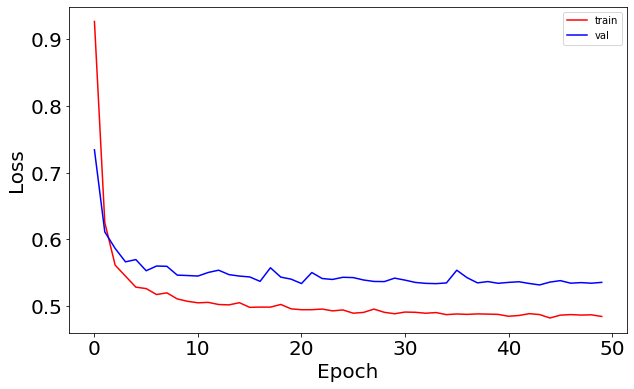

In [ ]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

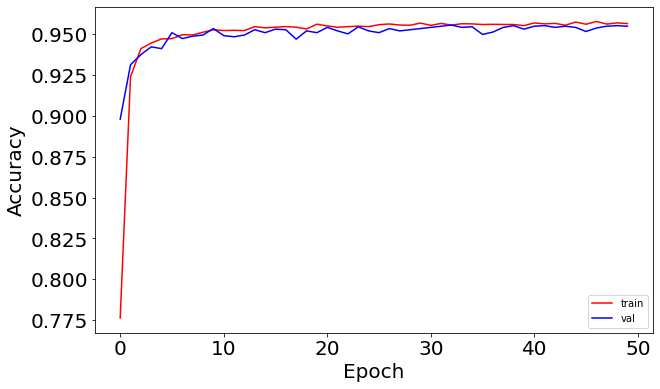

In [ ]:
# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(lr_model_history.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(lr_model_history.history['val_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Learning rate scheduler

In [ ]:
epochs = 50
learning_rate = 0.1 # initial learning rate
decay_rate = 0.1
momentum = 0.8

# define the optimizer function
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [ ]:
input_dim = X_train.shape[1]
batch_size = 150

# build the model
exponential_decay_model = Sequential()
exponential_decay_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='uniform',
                                  input_dim = input_dim))
exponential_decay_model.add(Dropout(0.1))
exponential_decay_model.add(Dense(64, kernel_initializer='uniform', activation=tf.nn.relu))
exponential_decay_model.add(Dense(3, kernel_initializer='uniform', activation=tf.nn.softmax))

# compile the model
exponential_decay_model.compile(loss='categorical_crossentropy',
                                optimizer=sgd,
                                metrics=['accuracy'])

In [ ]:
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
# define the learning rate change
def exp_decay(epoch):
    lrate = learning_rate * np.exp(-decay_rate*epoch)
    return lrate

# learning schedule callback
loss_history = History()
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [loss_history, lr_rate]

In [ ]:
# you invoke the LearningRateScheduler during the .fit() phase
t1 = time()
exponential_decay_model_history = exponential_decay_model.fit(X_train, y_train,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    callbacks=callbacks_list,
                                    verbose=0,
                                    validation_data=(X_test, y_test))
t2 = time()
val_performance['Exponential'] = model.evaluate(X_val, Y_val, verbose=0)
performance['Exponential'] = model.evaluate(X_test, Y_test, verbose=0)
run_time['Exponential'] = t2 - t1

In [ ]:
plot_model(model, to_file='model7.png', show_shapes=True, show_layer_names=True)
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 60)                1140      
_________________________________________________________________
dense_120 (Dense)            (None, 30)                1830      
_________________________________________________________________
dense_121 (Dense)            (None, 3)                 93        
Total params: 3,063
Trainable params: 3,063
Non-trainable params: 0
_________________________________________________________________


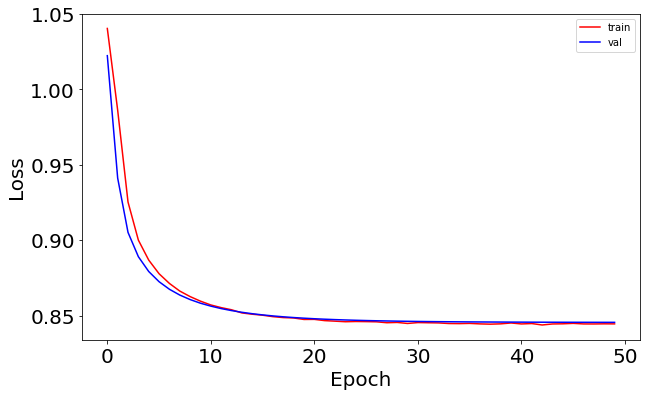

In [ ]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(exponential_decay_model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(exponential_decay_model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

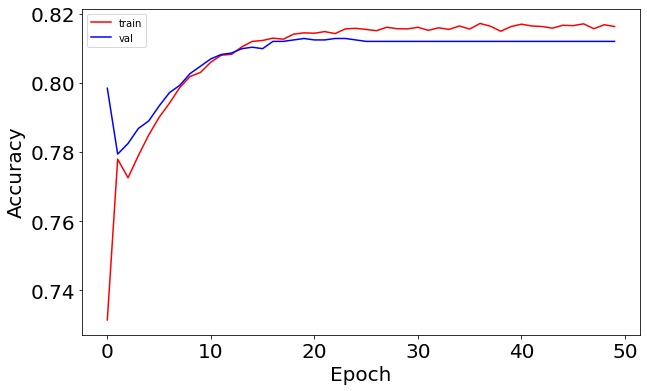

In [ ]:
# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(exponential_decay_model_history.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(exponential_decay_model_history.history['val_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Optimization function

In [ ]:
from keras.optimizers import RMSprop
model = Sequential()
model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='uniform',
                input_dim = input_dim)) # fully-connected layer with 64 hidden units
model.add(Dropout(0.1))
model.add(Dense(64, kernel_initializer='uniform', activation=tf.nn.relu))
model.add(Dense(3, kernel_initializer='uniform', activation=tf.nn.softmax))

# defining the parameters for RMSprop (I used the keras defaults here)
rms = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=rms,
              metrics=['accuracy'])

In [ ]:
batch_size = 100
epochs = 60
t1 = time()
model_history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(X_test, Y_test))
t2 = time()
val_performance['RMSprop'] = model.evaluate(X_val, Y_val, verbose=0)
performance['RMSprop'] = model.evaluate(X_test, Y_test, verbose=0)
run_time['RMSprop'] = t2 - t1

In [ ]:
plot_model(model, to_file='model8.png', show_shapes=True, show_layer_names=True)
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 64)                1216      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_129 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_130 (Dense)            (None, 3)                 195       
Total params: 5,571
Trainable params: 5,571
Non-trainable params: 0
_________________________________________________________________


In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.30744668841362
Test accuracy: 0.9010238647460938


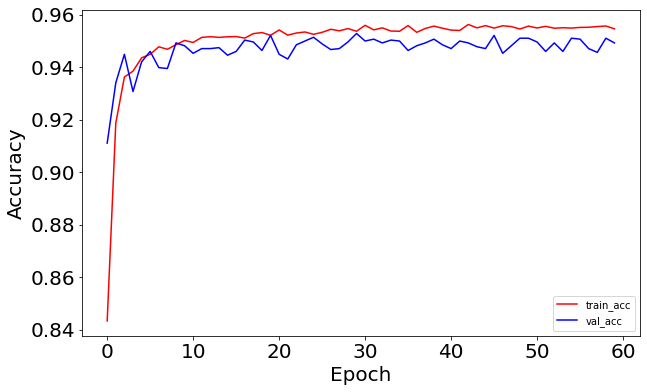

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['accuracy']), 'r', label='train_acc')
ax.plot(np.sqrt(model_history.history['val_accuracy']), 'b' ,label='val_acc')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

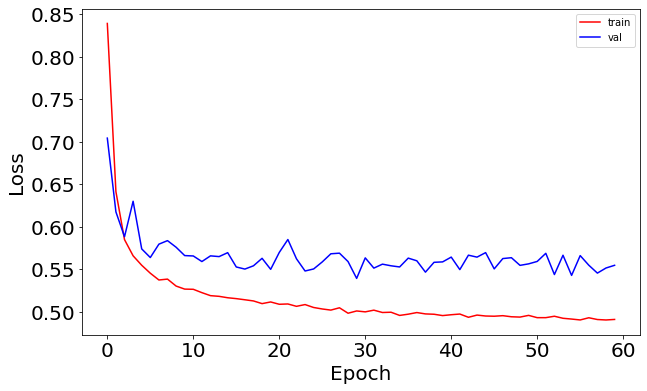

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Grid Search Deep Learning Model Parameters

In [ ]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='rmsprop', init='glorot_uniform'):
	# create model
  model = Sequential()
  model.add(Dense(60, activation='relu', input_shape=(n_features,)))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.add( keras.layers.Flatten())
	# Compile model
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
from sklearn.model_selection import GridSearchCV
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# grid search epochs, batch size and optimizer
#optimizers = ['rmsprop', 'adam', 'sgd']
init = ['glorot_uniform', 'hr_normal', 'uniform']
epochs = [50,70]
batches = [140, 170, 250]
param_grid = dict( epochs=epochs, batch_size=batches, init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.911860 using {'batch_size': 140, 'epochs': 70, 'init': 'uniform'}
0.910324 (0.004412) with: {'batch_size': 140, 'epochs': 50, 'init': 'glorot_uniform'}
0.908959 (0.006601) with: {'batch_size': 140, 'epochs': 50, 'init': 'hr_normal'}
0.910751 (0.004261) with: {'batch_size': 140, 'epochs': 50, 'init': 'uniform'}
0.910922 (0.003723) with: {'batch_size': 140, 'epochs': 70, 'init': 'glorot_uniform'}
0.910751 (0.001934) with: {'batch_size': 140, 'epochs': 70, 'init': 'hr_normal'}
0.911860 (0.004228) with: {'batch_size': 140, 'epochs': 70, 'init': 'uniform'}
0.903925 (0.007686) with: {'batch_size': 170, 'epochs': 50, 'init': 'glorot_uniform'}
0.904096 (0.007090) with: {'batch_size': 170, 'epochs': 50, 'init': 'hr_normal'}
0.900768 (0.009753) with: {'batch_size': 170, 'epochs': 50, 'init': 'uniform'}
0.901962 (0.008453) with: {'batch_size': 170, 'epochs': 70, 'init': 'glorot_uniform'}
0.905461 (0.007018) with: {'batch_size': 170, 'epochs': 70, 'init': 'hr_normal'}
0.905546 (0.006145) w

In [ ]:
t_model = Sequential()
t_model.add(Dense(60, kernel_initializer='uniform', activation='relu',
                  input_shape=(n_features,)))
t_model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
t_model.add(Dense(3, kernel_initializer='uniform', activation='softmax'))
t_model.add( keras.layers.Flatten())
# Compile model
t_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size = 140
epochs = 50
t1 = time()
model_history = t_model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(X_test, Y_test))
t2 = time()
val_performance['HyperTuned'] = t_model.evaluate(X_val, Y_val, verbose=0)
performance['HyperTuned'] = t_model.evaluate(X_test, Y_test, verbose=0)
run_time['HyperTuned'] = t2 - t1

In [ ]:
plot_model(t_model, to_file='model9.png', show_shapes=True, show_layer_names=True)
t_model.summary()

Model: "sequential_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_404 (Dense)            (None, 60)                1140      
_________________________________________________________________
dense_405 (Dense)            (None, 30)                1830      
_________________________________________________________________
dense_406 (Dense)            (None, 3)                 93        
_________________________________________________________________
flatten_91 (Flatten)         (None, 3)                 0         
Total params: 3,063
Trainable params: 3,063
Non-trainable params: 0
_________________________________________________________________


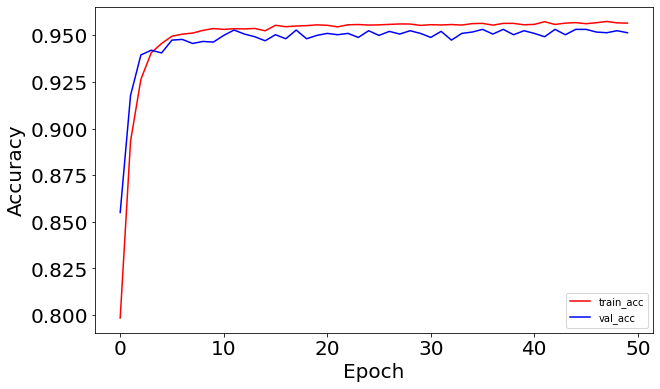

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['accuracy']), 'r', label='train_acc')
ax.plot(np.sqrt(model_history.history['val_accuracy']), 'b' ,label='val_acc')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

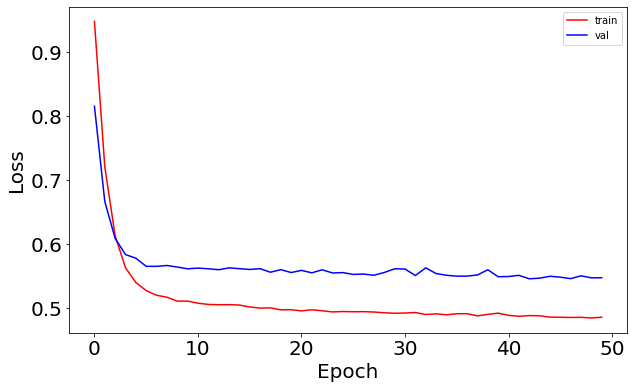

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

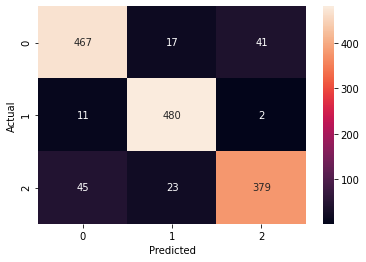

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = t_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
#plot confusion matrix
results = {'y_Actual':Y_test, 'y_Predicted':y_pred}
df_results = pd.DataFrame(results, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_results['y_Actual'], df_results['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()

### Kaggle Submission

In [ ]:
# Read CSV file into a data frame
kaggle_df = pd.read_csv('COVID_dataset_Kaggle.csv')
kaggle_df.head()

,id,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,0,2020-07-03,2020-07-06,2020-07-06,2020-07-05,30s,MALE,CC,Mississauga,NaN,43.647471,-79.708893
1,1,2021-01-05,2021-01-13,2021-01-13,2021-01-13,80s,FEMALE,NO KNOWN EPI LINK,Peterborough,NaN,44.301632,-78.321347
2,2,2021-01-02,2021-01-07,2021-01-07,2021-01-06,60s,MALE,CC,Toronto,NaN,43.656591,-79.379358
3,3,2020-12-04,2020-12-05,2020-12-05,2020-12-04,70s,FEMALE,OB,Hamilton,Yes,43.257631,-79.871341
4,4,2021-01-17,2021-01-19,2021-01-19,2021-01-17,40s,MALE,MISSING INFORMATION,Toronto,NaN,43.656591,-79.379358


In [ ]:
kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704 entries, 0 to 3703
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       3704 non-null   int64  
 1   Accurate_Episode_Date    3704 non-null   object 
 2   Case_Reported_Date       3704 non-null   object 
 3   Test_Reported_Date       3654 non-null   object 
 4   Specimen_Date            3674 non-null   object 
 5   Age_Group                3704 non-null   object 
 6   Client_Gender            3704 non-null   object 
 7   Case_AcquisitionInfo     3704 non-null   object 
 8   Reporting_PHU_City       3704 non-null   object 
 9   Outbreak_Related         1488 non-null   object 
 10  Reporting_PHU_Latitude   3704 non-null   float64
 11  Reporting_PHU_Longitude  3704 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 347.4+ KB


In [ ]:
kaggle_df.size

44448

### Covid Data Preprocessing

In [ ]:
kaggle_df.Age_Group.unique()

array(['30s', '80s', '60s', '70s', '40s', '90s', '20s', '<20', '50s'],
      dtype=object)

In [ ]:
kaggle_df['Age_Group'] = kaggle_df['Age_Group'].map(age_mapping)

In [ ]:
kaggle_df.Client_Gender.unique()

array(['MALE', 'FEMALE', 'UNSPECIFIED'], dtype=object)

In [ ]:
kaggle_df.Case_AcquisitionInfo.unique()

array(['CC', 'NO KNOWN EPI LINK', 'OB', 'MISSING INFORMATION', 'TRAVEL',
       'UNSPECIFIED EPI LINK'], dtype=object)

In [ ]:
kaggle_df.Outbreak_Related.unique()

array([nan, 'Yes'], dtype=object)

In [ ]:
kaggle_df['Outbreak_Related'].fillna('No', inplace = True)

In [ ]:
kaggle_df.isnull().sum()

id                          0
Accurate_Episode_Date       0
Case_Reported_Date          0
Test_Reported_Date         50
Specimen_Date              30
Age_Group                   0
Client_Gender               0
Case_AcquisitionInfo        0
Reporting_PHU_City          0
Outbreak_Related            0
Reporting_PHU_Latitude      0
Reporting_PHU_Longitude     0
dtype: int64

In [ ]:
kaggle_df = kaggle_df.fillna(method='ffill')

In [ ]:
kaggle_df.nunique(axis=0)

id                         3704
Accurate_Episode_Date       287
Case_Reported_Date          275
Test_Reported_Date          276
Specimen_Date               275
Age_Group                     9
Client_Gender                 3
Case_AcquisitionInfo          6
Reporting_PHU_City           31
Outbreak_Related              2
Reporting_PHU_Latitude       31
Reporting_PHU_Longitude      31
dtype: int64

In [ ]:
kaggle_df['Accurate_Episode_Date'] = pd.to_datetime(kaggle_df['Accurate_Episode_Date'],
                                                   infer_datetime_format=True, errors='coerce')
kaggle_df['Case_Reported_Date'] = pd.to_datetime(kaggle_df['Case_Reported_Date'],
                                                   infer_datetime_format=True, errors='coerce')
kaggle_df['Test_Reported_Date'] = pd.to_datetime(kaggle_df['Test_Reported_Date'],
                                                   infer_datetime_format=True, errors='coerce')
kaggle_df['Specimen_Date'] = pd.to_datetime(kaggle_df['Specimen_Date'],
                                                   infer_datetime_format=True, errors='coerce')

In [ ]:
kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704 entries, 0 to 3703
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       3704 non-null   int64         
 1   Accurate_Episode_Date    3704 non-null   datetime64[ns]
 2   Case_Reported_Date       3704 non-null   datetime64[ns]
 3   Test_Reported_Date       3704 non-null   datetime64[ns]
 4   Specimen_Date            3704 non-null   datetime64[ns]
 5   Age_Group                3704 non-null   int64         
 6   Client_Gender            3704 non-null   object        
 7   Case_AcquisitionInfo     3704 non-null   object        
 8   Reporting_PHU_City       3704 non-null   object        
 9   Outbreak_Related         3704 non-null   object        
 10  Reporting_PHU_Latitude   3704 non-null   float64       
 11  Reporting_PHU_Longitude  3704 non-null   float64       
dtypes: datetime64[ns](4), float64(2), 

In [ ]:
kaggle_df.head()

,id,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,0,2020-07-03,2020-07-06,2020-07-06,2020-07-05,30,MALE,CC,Mississauga,No,43.647471,-79.708893
1,1,2021-01-05,2021-01-13,2021-01-13,2021-01-13,80,FEMALE,NO KNOWN EPI LINK,Peterborough,No,44.301632,-78.321347
2,2,2021-01-02,2021-01-07,2021-01-07,2021-01-06,60,MALE,CC,Toronto,No,43.656591,-79.379358
3,3,2020-12-04,2020-12-05,2020-12-05,2020-12-04,70,FEMALE,OB,Hamilton,Yes,43.257631,-79.871341
4,4,2021-01-17,2021-01-19,2021-01-19,2021-01-17,40,MALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358


In [ ]:
kaggle_df['Accurate_Episode_Date'] = kaggle_df['Accurate_Episode_Date'].apply(to_ksp_format)
kaggle_df['Case_Reported_Date'] = kaggle_df['Case_Reported_Date'].apply(to_ksp_format)
kaggle_df['Test_Reported_Date'] = kaggle_df['Test_Reported_Date'].apply(to_ksp_format)
kaggle_df['Specimen_Date'] = kaggle_df['Specimen_Date'].apply(to_ksp_format)

In [ ]:
# Remove id from test dataset and store it
index = np.array(kaggle_df['id'])
kaggle_df = kaggle_df.drop("id", axis = 1)
kaggle_df = kaggle_df.drop("Reporting_PHU_City", axis = 1)

In [ ]:
enc = pd.get_dummies(kaggle_df, columns = cat_col)

In [ ]:
enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3704 entries, 0 to 3703
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Accurate_Episode_Date                      3704 non-null   float64
 1   Case_Reported_Date                         3704 non-null   float64
 2   Test_Reported_Date                         3704 non-null   float64
 3   Specimen_Date                              3704 non-null   float64
 4   Age_Group                                  3704 non-null   int64  
 5   Reporting_PHU_Latitude                     3704 non-null   float64
 6   Reporting_PHU_Longitude                    3704 non-null   float64
 7   Client_Gender_FEMALE                       3704 non-null   uint8  
 8   Client_Gender_MALE                         3704 non-null   uint8  
 9   Client_Gender_UNSPECIFIED                  3704 non-null   uint8  
 10  Case_AcquisitionInfo_CC 

In [ ]:
scaler  = StandardScaler()
enc = scaler.fit_transform(enc)

In [ ]:
preds = t_model.predict(enc)

In [ ]:
preds = np.argmax(preds, axis=1)

In [ ]:
preds = encoder.inverse_transform(preds)

In [ ]:
preds = preds.reshape(-1,1)
index = index.reshape(-1,1)

In [ ]:
xy=np.concatenate((index,preds),axis=1)

In [ ]:
np.savetxt('submission.csv', [p for p in (xy)], delimiter = ',', fmt = '%s',
           header = 'id,Outcome1', comments = '')

### Recurrent Neural Network

In [ ]:
rnn_df.head()

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,2020-03-30,2020-03-31,2020-03-31,2020-03-30,70.0,MALE,OB,Stratford,Yes,43.368662,-81.001913,Fatal
1,2021-01-22,2021-01-24,2021-01-24,2021-01-23,50.0,FEMALE,NO KNOWN EPI LINK,Newmarket,No,44.048023,-79.480239,Not Resolved
2,2020-03-24,2020-04-14,2020-04-14,2020-04-13,70.0,FEMALE,OB,Toronto,Yes,43.656591,-79.379358,Resolved
3,2021-01-18,2021-01-21,2021-01-21,2021-01-18,10.0,MALE,CC,Mississauga,No,43.647471,-79.708893,Not Resolved
4,2020-12-26,2020-12-28,2020-12-28,2020-12-26,60.0,MALE,OB,Windsor,Yes,42.308796,-83.033670,Resolved


In [ ]:
rnn_df = rnn_df.drop("Reporting_PHU_City", axis = 1)

In [ ]:
rnn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14650 entries, 0 to 14859
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Accurate_Episode_Date    14650 non-null  datetime64[ns]
 1   Case_Reported_Date       14650 non-null  datetime64[ns]
 2   Test_Reported_Date       14650 non-null  datetime64[ns]
 3   Specimen_Date            14650 non-null  datetime64[ns]
 4   Age_Group                14650 non-null  float64       
 5   Client_Gender            14650 non-null  object        
 6   Case_AcquisitionInfo     14650 non-null  object        
 7   Outbreak_Related         14650 non-null  object        
 8   Reporting_PHU_Latitude   14650 non-null  float64       
 9   Reporting_PHU_Longitude  14650 non-null  float64       
 10  Outcome1                 14650 non-null  object        
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 1.3+ MB


In [ ]:
rnn_enc = pd.get_dummies(rnn_df, columns = cat_col)

In [ ]:
rnn_enc['Outcome1'] = encoder.transform(rnn_enc['Outcome1'])

In [ ]:
rnn_enc.head()

,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1,Client_Gender_FEMALE,Client_Gender_GENDER DIVERSE,Client_Gender_MALE,Client_Gender_UNSPECIFIED,Case_AcquisitionInfo_CC,Case_AcquisitionInfo_MISSING INFORMATION,Case_AcquisitionInfo_NO KNOWN EPI LINK,Case_AcquisitionInfo_OB,Case_AcquisitionInfo_TRAVEL,Case_AcquisitionInfo_UNSPECIFIED EPI LINK,Outbreak_Related_No,Outbreak_Related_Yes
0,2020-03-30,2020-03-31,2020-03-31,2020-03-30,70.0,43.368662,-81.001913,0,0,0,1,0,0,0,0,1,0,0,0,1
1,2021-01-22,2021-01-24,2021-01-24,2021-01-23,50.0,44.048023,-79.480239,1,1,0,0,0,0,0,1,0,0,0,1,0
2,2020-03-24,2020-04-14,2020-04-14,2020-04-13,70.0,43.656591,-79.379358,2,1,0,0,0,0,0,0,1,0,0,0,1
3,2021-01-18,2021-01-21,2021-01-21,2021-01-18,10.0,43.647471,-79.708893,1,0,0,1,0,1,0,0,0,0,0,1,0
4,2020-12-26,2020-12-28,2020-12-28,2020-12-26,60.0,42.308796,-83.033670,2,0,0,1,0,0,0,0,1,0,0,0,1


In [ ]:
rnn_enc = rnn_enc.loc[:, ['Accurate_Episode_Date', 'Outcome1']]
rnn_enc.sort_values('Accurate_Episode_Date', inplace=True, ascending=True)
rnn_enc = rnn_enc.reset_index(drop=True)

print('Number of rows and columns after removing missing values:', rnn_enc.shape)
print('The time series starts from: ', rnn_enc['Accurate_Episode_Date'].min())
print('The time series ends on: ', rnn_enc['Accurate_Episode_Date'].max())

Number of rows and columns after removing missing values: (14650, 2)
The time series starts from:  2020-01-10 00:00:00
The time series ends on:  2021-01-30 00:00:00


In [ ]:
from datetime import timedelta
# Split into training, validation and test datasets.
# Since it's timeseries we should do it by date.
test_cutoff_date = rnn_enc['Accurate_Episode_Date'].max() - timedelta(days=7)
val_cutoff_date = test_cutoff_date - timedelta(days=14)

df_test = rnn_enc[rnn_enc['Accurate_Episode_Date'] > test_cutoff_date]
df_val = rnn_enc[(rnn_enc['Accurate_Episode_Date'] > val_cutoff_date) &
                 (rnn_enc['Accurate_Episode_Date'] <= test_cutoff_date)]
df_train = rnn_enc[rnn_enc['Accurate_Episode_Date'] <= val_cutoff_date]

#check out the datasets
print('Test dates: {} to {}'.format(df_test['Accurate_Episode_Date'].min(),
                                    df_test['Accurate_Episode_Date'].max()))
print('Validation dates: {} to {}'.format(df_val['Accurate_Episode_Date'].min(),
                                          df_val['Accurate_Episode_Date'].max()))
print('Train dates: {} to {}'.format(df_train['Accurate_Episode_Date'].min(),
                                     df_train['Accurate_Episode_Date'].max()))

Test dates: 2021-01-24 00:00:00 to 2021-01-30 00:00:00
Validation dates: 2021-01-10 00:00:00 to 2021-01-23 00:00:00
Train dates: 2020-01-10 00:00:00 to 2021-01-09 00:00:00


In [ ]:
#Create tensors
import os
import math
def create_ts_files(dataset,
                    start_index,
                    end_index,
                    history_length,
                    step_size,
                    target_step,
                    num_rows_per_file,
                    data_folder):
    assert step_size > 0
    assert start_index >= 0

    if not os.path.exists(data_folder):
        os.makedirs(data_folder)
    time_lags = sorted(range(target_step+1, target_step+history_length+1, step_size),
                           reverse=True)
    col_names = [f'x_lag{i}' for i in time_lags] + ['y']
    start_index = start_index + history_length
    if end_index is None:
        end_index = len(dataset) - target_step

    rng = range(start_index, end_index)
    num_rows = len(rng)
    num_files = math.ceil(num_rows/num_rows_per_file)

    # for each file.
    print(f'Creating {num_files} files.')
    for i in range(num_files):
        filename = f'{data_folder}/ts_file{i}.pkl'

        if i % 10 == 0:
            print(f'{filename}')

        # get the start and end indices.
        ind0 = i*num_rows_per_file
        ind1 = min(ind0 + num_rows_per_file, end_index)
        data_list = []

        # j in the current timestep. Will need j-n to j-1 for the history.
        #And j + target_step for the target.
        for j in range(ind0, ind1):
            indices = range(j-1, j-history_length-1, -step_size)
            data = dataset[sorted(indices) + [j+target_step]]

            # append data to the list.
            data_list.append(data)

        df_ts = pd.DataFrame(data=data_list, columns=col_names)
        df_ts.to_pickle(filename)

    return len(col_names)-1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
outcome = df_train['Outcome1'].values

# Scaled to work with Neural networks.
scaler = MinMaxScaler(feature_range=(0, 1))
outcome_scaled = scaler.fit_transform(outcome.reshape(-1, 1)).reshape(-1, )

history_length = 7*24  # The history length.
step_size = 10  # The sampling rate of the history. Eg. If step_size = 1,
                # then values from every minute will be in the history.
                # If step size = 10 then values every 10 minutes will be in the history.
target_step = 10  # The time step in the future to predict. Eg. If target_step = 0,
                  # then predict the next timestep after the end of the history period.
                  # If target_step = 10 then predict 10 timesteps the next timestep
                  #(11 minutes after the end of history).

# The csv creation returns the number of rows and number of features.
#We need these values below.
num_timesteps = create_ts_files(outcome_scaled,
                                start_index=0,
                                end_index=None,
                                history_length=history_length,
                                step_size=step_size,
                                target_step=target_step,
                                num_rows_per_file=128*100,
                                data_folder='ts_data')


Creating 1 files.
ts_data/ts_file0.pkl


In [ ]:
class TimeSeriesLoader:
    def __init__(self, ts_folder, filename_format):
        self.ts_folder = ts_folder

        # find the number of files.
        i = 0
        file_found = True
        while file_found:
            filename = self.ts_folder + '/' + filename_format.format(i)
            file_found = os.path.exists(filename)
            if file_found:
                i += 1

        self.num_files = i
        self.files_indices = np.arange(self.num_files)
        self.shuffle_chunks()

    def num_chunks(self):
        return self.num_files

    def get_chunk(self, idx):
        assert (idx >= 0) and (idx < self.num_files)

        ind = self.files_indices[idx]
        filename = self.ts_folder + '/' + filename_format.format(ind)
        df_ts = pd.read_pickle(filename)
        num_records = len(df_ts.index)

        features = df_ts.drop('y', axis=1).values
        target = df_ts['y'].values

        # reshape for input into LSTM. Batch major format.
        features_batchmajor = np.array(features).reshape(num_records, -1, 1)
        return features_batchmajor, target

     # this shuffles the order the chunks will be outputted from get_chunk.
    def shuffle_chunks(self):
        np.random.shuffle(self.files_indices)

In [ ]:
ts_folder = 'ts_data'
filename_format = 'ts_file{}.pkl'
tss = TimeSeriesLoader(ts_folder, filename_format)

In [ ]:
# Create the Keras model.

ts_inputs = tf.keras.Input(shape=(num_timesteps, 1))

# units=10 -> The cell and hidden states will be of dimension 10.
#             The number of parameters that need to be trained = 4*units*(units+2)
x = keras.layers.LSTM(units=10)(ts_inputs)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)
model = tf.keras.Model(inputs=ts_inputs, outputs=outputs)

In [ ]:
# Specify the training configuration.
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [ ]:
plot_model(model, to_file='model10.png', show_shapes=True, show_layer_names=True)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17, 1)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_407 (Dense)            (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train in batch sizes of 128.
BATCH_SIZE = 128
NUM_EPOCHS = 50
NUM_CHUNKS = tss.num_chunks()

for epoch in range(NUM_EPOCHS):
    print('epoch #{}'.format(epoch))
    for i in range(NUM_CHUNKS):
        X, y = tss.get_chunk(i)
        t1 = time()
        model.fit(x=X, y=y, batch_size=BATCH_SIZE)
        t2 = time()
    # shuffle the chunks so they're not in the same order next time around.
    tss.shuffle_chunks()

epoch #0
72/72 [==============================] - 30s 3ms/step - loss: 0.4261 - accuracy: 0.4928
epoch #1
72/72 [==============================] - 0s 3ms/step - loss: 0.2514 - accuracy: 0.5160
epoch #2
72/72 [==============================] - 0s 3ms/step - loss: 0.2450 - accuracy: 0.5478
epoch #3
72/72 [==============================] - 0s 3ms/step - loss: 0.2356 - accuracy: 0.6020
epoch #4
72/72 [==============================] - 0s 3ms/step - loss: 0.2320 - accuracy: 0.6063
epoch #5
72/72 [==============================] - 0s 3ms/step - loss: 0.2289 - accuracy: 0.6174
epoch #6
72/72 [==============================] - 0s 3ms/step - loss: 0.2260 - accuracy: 0.6226
epoch #7
72/72 [==============================] - 0s 4ms/step - loss: 0.2248 - accuracy: 0.6239
epoch #8
72/72 [==============================] - 0s 4ms/step - loss: 0.2245 - accuracy: 0.6288
epoch #9
72/72 [==============================] - 0s 3ms/step - loss: 0.2230 - accuracy: 0.6273
epoch #10
72/72 [======================

In [ ]:
# evaluate the model on the validation set.
#
# Create the validation CSV like we did before with the training.
outcome_val = df_val['Outcome1'].values
outcome_val_scaled = scaler.transform(outcome_val.reshape(-1, 1)).reshape(-1, )

history_length = 7*24  # The history length
step_size = 10
target_step = 10

# The csv creation returns the number of rows and number of features.
num_timesteps = create_ts_files(outcome_val_scaled,
                                start_index=0,
                                end_index=None,
                                history_length=history_length,
                                step_size=step_size,
                                target_step=target_step,
                                num_rows_per_file=128*100,
                                data_folder='ts_val_data')

Creating 1 files.
ts_val_data/ts_file0.pkl


In [ ]:
from sklearn.metrics import mean_squared_error
# If we assume that the validation dataset can fit into memory we can do this.
df_val_ts = pd.read_pickle('ts_val_data/ts_file0.pkl')


features = df_val_ts.drop('y', axis=1).values
features_arr = np.array(features)

# reshape for input into LSTM. Batch major format.
num_records = len(df_val_ts.index)
features_batchmajor = features_arr.reshape(num_records, -1, 1)


y_pred = model.predict(features_batchmajor).reshape(-1, )
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1 ,)

y_act = df_val_ts['y'].values
y_act = scaler.inverse_transform(y_act.reshape(-1, 1)).reshape(-1 ,)

print('validation mean squared error: {}'.format(mean_squared_error(y_act, y_pred)))
#baseline
y_pred_baseline = df_val_ts['x_lag11'].values
y_pred_baseline = scaler.inverse_transform(y_pred_baseline.reshape(-1, 1)).reshape(-1 ,)
print('validation baseline mean squared error: {}'.format(mean_squared_error(y_act,
                                                                             y_pred_baseline)))

validation mean squared error: 0.1519070804354985
validation baseline mean squared error: 0.2737226277372263


In [ ]:
from sklearn.metrics import accuracy_score
val_performance['RNN'] = [mean_squared_error(y_act, y_pred),
                          accuracy_score(y_act, y_pred_baseline)]
run_time['RNN'] = t2 - t1

In [ ]:
# evaluate the model on the test set.
#
# Create the test CSV like we did before with the training.
outcome_test = df_test['Outcome1'].values
outcome_test_scaled = scaler.transform(outcome_test.reshape(-1, 1)).reshape(-1, )

history_length = 7*24  # The history length
step_size = 10
target_step = 10

# The csv creation returns the number of rows and number of features.
num_timesteps = create_ts_files(outcome_test_scaled,
                                start_index=0,
                                end_index=None,
                                history_length=history_length,
                                step_size=step_size,
                                target_step=target_step,
                                num_rows_per_file=128*100,
                                data_folder='ts_test_data')

Creating 1 files.
ts_test_data/ts_file0.pkl


In [ ]:
df_test_ts = pd.read_pickle('ts_test_data/ts_file0.pkl')


features = df_test_ts.drop('y', axis=1).values
features_arr = np.array(features)

# reshape for input into LSTM. Batch major format.
num_records = len(df_test_ts.index)
features_batchmajor = features_arr.reshape(num_records, -1, 1)


y_pred_t = model.predict(features_batchmajor).reshape(-1, )
y_pred_t = scaler.inverse_transform(y_pred_t.reshape(-1, 1)).reshape(-1 ,)

y_act_t = df_test_ts['y'].values
y_act_t = scaler.inverse_transform(y_act_t.reshape(-1, 1)).reshape(-1 ,)

print('test mean squared error: {}'.format(mean_squared_error(y_act_t, y_pred_t)))
#baseline
y_pred_baseline = df_test_ts['x_lag11'].values
y_pred_baseline = scaler.inverse_transform(y_pred_baseline.reshape(-1, 1)).reshape(-1 ,)
print('test baseline mean squared error: {}'.format(mean_squared_error(y_act_t,
                                                                             y_pred_baseline)))

test mean squared error: 0.004426308949860911
test baseline mean squared error: 0.00851063829787234


In [ ]:
performance['RNN'] = [mean_squared_error(y_act_t, y_pred_t),
                      accuracy_score(y_act_t, y_pred_baseline)]

### Performance Analysis

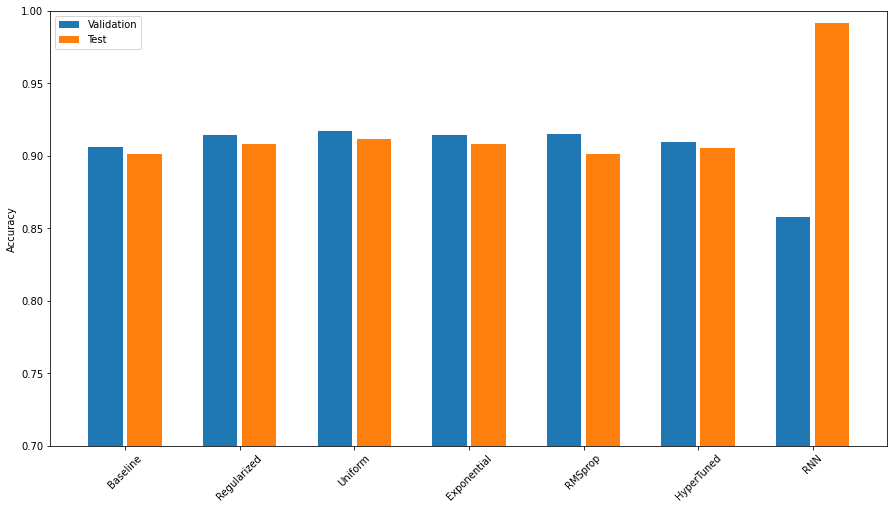

In [ ]:
# Accuracy comparison of various models
x = np.arange(len(performance))
width = 0.3
metric_name = 'accuracy'
metric_index = t_model.metrics_names.index(metric_name)
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]
plt.rcParams["figure.figsize"] = (15,8)
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

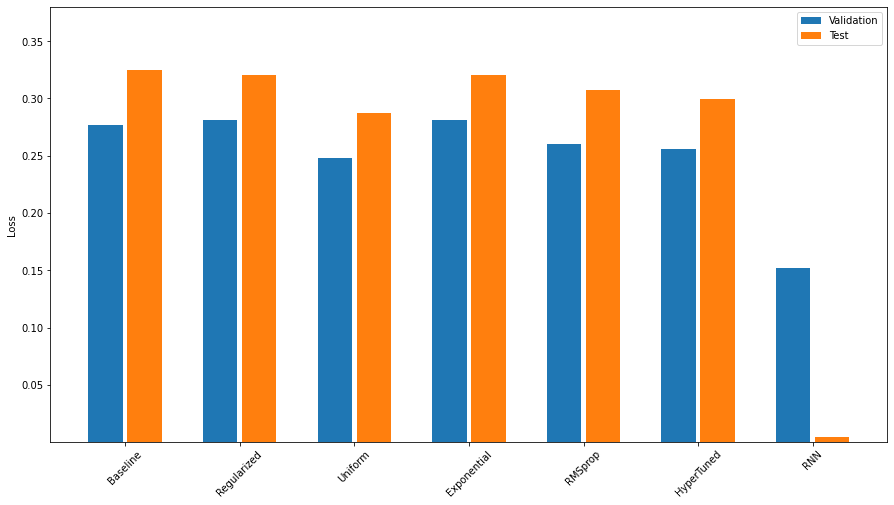

In [ ]:
# Loss comparison of various models
x = np.arange(len(performance))
width = 0.3
metric_name = 'loss'
metric_index = t_model.metrics_names.index('loss')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]
plt.rcParams["figure.figsize"] = (15,8)
plt.ylabel('Loss')
plt.ylim([0.0005, 0.38])
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

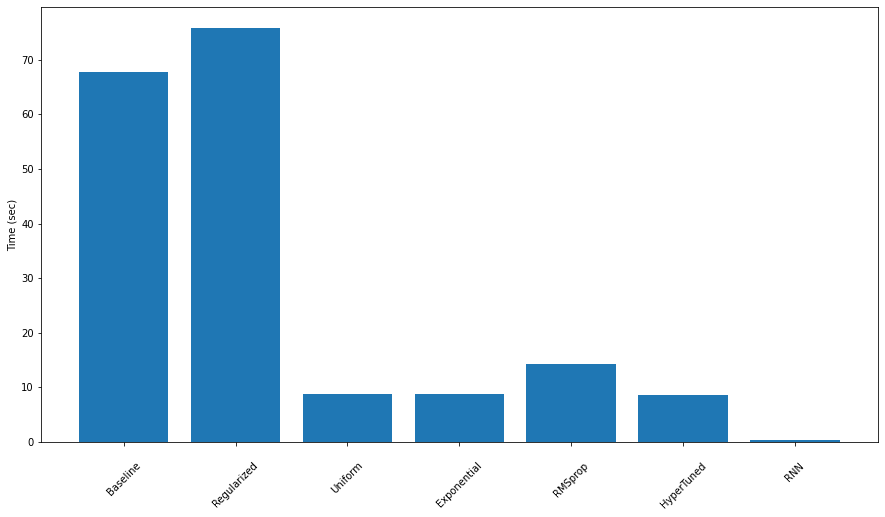

In [ ]:
# Run time comparison of varoius models
x = np.arange(len(performance))
plt.bar(range(len(run_time)), list(run_time.values()), align='center')
plt.xticks(range(len(run_time)), list(run_time.keys()))
plt.ylabel('Time (sec)')
plt.xticks(ticks=x, labels=run_time.keys(),
           rotation=45)
plt.tick_params(axis='x', which='major', pad=15)
width = 0.3
plt.show()